In [1]:
## Import libraries

In [2]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(scales)
library(stringr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# It is important to emphasize that some samples do not have timestamps because it is not provided 
# for 'scheduled' status. But, I dont know its reason.

In [4]:
df_log <- read.csv(file = 'events.csv', sep = ',', stringsAsFactors = FALSE)
df_log$creation_timestamp <- as.POSIXct(df_log$creation_timestamp,format='%Y-%m-%dT%H:%M:%SZ', tzone = "UTC")
df_log$timestamp <- as.numeric(df_log$creation_timestamp)
#df_log$timestamp[is.na(df_log$timestamp)] <- Inf

df_log <- df_log %>%
  group_by(uid) %>%
  mutate(min_timestamp = min(timestamp)) %>%
  ungroup()
summary(df_log)

     uid                name           function_name     
 Length:142         Length:142         Length:142        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
 creation_timestamp            first_timestamp    last_timestamp    
 Min.   :2021-07-15 13:25:44   Length:142         Length:142        
 1st Qu.:2021-07-15 13:43:49   Class :character   Class :character  
 Median :2021-07-15 14:00:06   Mode  :character   Mode  :character  
 Mean   :2021-07-15 13:59:15                                        
 3rd Qu.:2021-07-15 14:15:55                                        
 Max.   :2021-07-15 14:33:58                                        
    reason              node             message            timestamp        
 Length:142         Length:142   

In [5]:
df_activations <- read.csv(file = 'activations.csv', sep = ',', stringsAsFactors = FALSE)
summary(df_activations)

  object_uid        object_name        function_name         duration        
 Length:88          Length:88          Length:88          Min.   :  0.00998  
 Class :character   Class :character   Class :character   1st Qu.:  0.03914  
 Mode  :character   Mode  :character   Mode  :character   Median :  1.10791  
                                                          Mean   : 18.68377  
                                                          3rd Qu.:  6.31607  
                                                          Max.   :296.03821  
                                                          NA's   :46         
   timestamp            reason            node         message       
 Min.   :1.626e+09   Length:88          Mode:logical   Mode:logical  
 1st Qu.:1.626e+09   Class :character   NA's:88        NA's:88       
 Median :1.626e+09   Mode  :character                                
 Mean   :1.626e+09                                                   
 3rd Qu.:1.626e+09        

In [6]:
####################################

In [7]:
# Timestamp analysis

In [8]:
####################################

In [9]:
### Filter the events file

In [10]:
df_filtered <- df_log %>%
    filter(
      reason == 'Scheduled' |
      reason == 'Pulling' |
      reason == 'Pulled' |
      reason == 'Created' |
      reason == 'Started' |
      reason == 'Killing')

df_selected <- df_filtered %>%
    select(-name, -uid, -message, -min_timestamp, -first_timestamp, -last_timestamp, -creation_timestamp)
summary(df_selected)

 function_name         reason              node             timestamp        
 Length:142         Length:142         Length:142         Min.   :1.626e+09  
 Class :character   Class :character   Class :character   1st Qu.:1.626e+09  
 Mode  :character   Mode  :character   Mode  :character   Median :1.626e+09  
                                                          Mean   :1.626e+09  
                                                          3rd Qu.:1.626e+09  
                                                          Max.   :1.626e+09  

In [11]:
### Process the events durations

In [12]:
df_spread <- df_selected %>%
    group_by_at(vars(-timestamp)) %>%
    mutate(sample_id = row_number()) %>% ungroup() %>%
    spread(reason, timestamp) %>%
    select(-sample_id) #%>%

print(df_spread)
df_processed <- df_spread

# A tibble: 45 x 8
   function_name  node        Created  Killing  Pulled Pulling Scheduled Started
   <chr>          <chr>         <dbl>    <dbl>   <dbl>   <dbl>     <dbl>   <dbl>
 1 chameleon2     paravance…   1.63e9   1.63e9  1.63e9 NA         1.63e9  1.63e9
 2 chameleon2     paravance…  NA        1.63e9 NA      NA        NA      NA     
 3 chameleon3     paravance…   1.63e9   1.63e9  1.63e9 NA         1.63e9  1.63e9
 4 chameleon3     paravance…  NA        1.63e9 NA      NA        NA      NA     
 5 facedetection1 paravance…   1.63e9   1.63e9  1.63e9  1.63e9    1.63e9  1.63e9
 6 facedetection1 paravance…  NA        1.63e9 NA      NA        NA      NA     
 7 facedetection2 paravance…   1.63e9   1.63e9  1.63e9 NA         1.63e9  1.63e9
 8 facedetection2 paravance…  NA        1.63e9 NA      NA        NA      NA     
 9 facedetection3 paravance…   1.63e9   1.63e9  1.63e9 NA         1.63e9  1.63e9
10 facedetection3 paravance…  NA        1.63e9 NA      NA        NA      NA     
# … with 

In [13]:
### Filter the activations file

In [14]:
df_activations_selected <- df_activations %>%
    select(
        function_name,
        timestamp,
        reason,
        node,
        object_uid) %>%
    drop_na(timestamp)
        #mutate(duration = (duration / 1000) %% 60)
summary(df_activations_selected)

 function_name        timestamp            reason            node        
 Length:46          Min.   :1.626e+09   Length:46          Mode:logical  
 Class :character   1st Qu.:1.626e+09   Class :character   NA's:46       
 Mode  :character   Median :1.626e+09   Mode  :character                 
                    Mean   :1.626e+09                                    
                    3rd Qu.:1.626e+09                                    
                    Max.   :1.626e+09                                    
  object_uid       
 Length:46         
 Class :character  
 Mode  :character  
                   
                   
                   

In [15]:
### First view of activations

In [16]:
head(df_activations_selected)

function_name  timestamp  reason         node
1 rnngenerate2   1626360520 finishing_time NA  
2 rnngenerate2   1626360520 starting_time  NA  
3 rnngenerate3   1626360506 finishing_time NA  
4 rnngenerate3   1626360505 starting_time  NA  
5 facedetection3 1626360679 finishing_time NA  
6 facedetection3 1626360501 starting_time  NA  
  object_uid                      
1 0adff090f21447069ff090f214270602
2 0adff090f21447069ff090f214270602
3 dcd0711a8d714f3b90711a8d71ff3bec
4 dcd0711a8d714f3b90711a8d71ff3bec
5 863a403577f543caba403577f5f3ca88
6 863a403577f543caba403577f5f3ca88

In [17]:
df_plot <- df_activations_selected #%>% drop_na(timestamp)
head(df_plot)
ggplot(data = df_plot, aes(x = node, 
                           #y = as.POSIXct(timestamp, origin = "1970-01-01"), 
                           y = timestamp,
                           color = function_name,
                           #shape = reason,
                           group = function_name)) + #, color = node)) +
    geom_line(size = 1, position = position_dodge(width = 0.5)) + 
    geom_point(position = position_dodge(width = 0.5)) +
    coord_flip() +

labs(x = "nodes", y = "timestamps", color = "function_name") +
   scale_fill_brewer(palette = "Dark2") +
   theme_bw() +
   theme(legend.position="bottom") +
   ggsave('full_line_plot_filtered.png')

function_name  timestamp  reason         node
1 rnngenerate2   1626360520 finishing_time NA  
2 rnngenerate2   1626360520 starting_time  NA  
3 rnngenerate3   1626360506 finishing_time NA  
4 rnngenerate3   1626360505 starting_time  NA  
5 facedetection3 1626360679 finishing_time NA  
6 facedetection3 1626360501 starting_time  NA  
  object_uid                      
1 0adff090f21447069ff090f214270602
2 0adff090f21447069ff090f214270602
3 dcd0711a8d714f3b90711a8d71ff3bec
4 dcd0711a8d714f3b90711a8d71ff3bec
5 863a403577f543caba403577f5f3ca88
6 863a403577f543caba403577f5f3ca88

Saving 6.67 x 6.67 in image



In [18]:
### Spread the timestamps of activations by categories

In [19]:
df_activations_selected <- df_activations %>%
    select(
       function_name,
       timestamp,
       reason) %>%
    drop_na()
    #mutate(duration = (duration / 1000) %% 60)
summary(df_activations_selected)

df_spread_activations <- df_activations_selected %>%
   group_by_at(vars(-timestamp)) %>%
   mutate(sample_id = row_number()) %>% ungroup() %>%
   spread(reason, timestamp) %>%
   select(-sample_id)

head(df_spread_activations)
tail(df_spread_activations)

 function_name        timestamp            reason         
 Length:46          Min.   :1.626e+09   Length:46         
 Class :character   1st Qu.:1.626e+09   Class :character  
 Mode  :character   Median :1.626e+09   Mode  :character  
                    Mean   :1.626e+09                     
                    3rd Qu.:1.626e+09                     
                    Max.   :1.626e+09                     

function_name   finishing_time starting_time
1 chameleon2      1626360284     1626360206   
2 chameleon3      1626360518     1626360222   
3 facedetection1  1626360606     1626360402   
4 facedetection2  1626360629     1626360437   
5 facedetection3  1626360679     1626360501   
6 floatoperation1 1626360202     1626360194

function_name finishing_time starting_time
1 pyaes1        1626360241     1626360230   
2 pyaes2        1626360268     1626360256   
3 pyaes3        1626360259     1626360248   
4 rnngenerate1  1626360498     1626360498   
5 rnngenerate2  1626360520     1626360520   
6 rnngenerate3  1626360506     1626360505

In [20]:
### Merge the activations and events data

In [21]:
df_events_to_join <- df_processed #%>% mutate(id = row_number())
head(df_events_to_join)
df_activations_to_join <- df_spread_activations #%>% mutate(id = row_number())
head(df_activations_to_join)

df_all <- full_join(
   df_events_to_join,
   df_activations_to_join,
   by="function_name") #%>%
   #distinct()
#df_all[is.na(df_all)] = 0

df_gathered <- df_all %>%
    gather(
        factor_key = 'TRUE',
        key = 'reason',
        value = 'timestamp',
        -function_name, -node) 

df_gathered$reason <- str_replace_all(df_gathered$reason, 'Scheduled', '00_pod_scheduled')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'Pulling', '01_container_pulling')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'Pulled', '02_container_pulled')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'Created', '03_container_created')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'Started', '04_container_started')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'starting_time', '05_function_started')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'finishing_time', '06_function_finished')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'Killing', '07_finishing_container')

head(df_gathered)
summary(df_gathered)

function_name  node                            Created    Killing   
1 chameleon2     paravance-45.rennes.grid5000.fr 1626349189 1626349842
2 chameleon2     paravance-45.rennes.grid5000.fr         NA 1626349842
3 chameleon3     paravance-45.rennes.grid5000.fr 1626349309 1626349963
4 chameleon3     paravance-45.rennes.grid5000.fr         NA 1626349963
5 facedetection1 paravance-6.rennes.grid5000.fr  1626351240 1626351991
6 facedetection1 paravance-6.rennes.grid5000.fr          NA 1626351991
  Pulled     Pulling    Scheduled  Started   
1 1626349189         NA 1626349187 1626349189
2         NA         NA         NA         NA
3 1626349309         NA 1626349308 1626349310
4         NA         NA         NA         NA
5 1626351239 1626351234 1626351233 1626351241
6         NA         NA         NA         NA

function_name   finishing_time starting_time
1 chameleon2      1626360284     1626360206   
2 chameleon3      1626360518     1626360222   
3 facedetection1  1626360606     1626360402   
4 facedetection2  1626360629     1626360437   
5 facedetection3  1626360679     1626360501   
6 floatoperation1 1626360202     1626360194

function_name  node                            reason              
1 chameleon2     paravance-45.rennes.grid5000.fr 03_container_created
2 chameleon2     paravance-45.rennes.grid5000.fr 03_container_created
3 chameleon3     paravance-45.rennes.grid5000.fr 03_container_created
4 chameleon3     paravance-45.rennes.grid5000.fr 03_container_created
5 facedetection1 paravance-6.rennes.grid5000.fr  03_container_created
6 facedetection1 paravance-6.rennes.grid5000.fr  03_container_created
  timestamp 
1 1626349189
2         NA
3 1626349309
4         NA
5 1626351240
6         NA

 function_name          node              reason            timestamp        
 Length:360         Length:360         Length:360         Min.   :1.626e+09  
 Class :character   Class :character   Class :character   1st Qu.:1.626e+09  
 Mode  :character   Mode  :character   Mode  :character   Median :1.626e+09  
                                                          Mean   :1.626e+09  
                                                          3rd Qu.:1.626e+09  
                                                          Max.   :1.626e+09  
                                                          NA's   :128        

In [22]:
df_plot <- df_gathered
summary(df_plot)


df_plot <- df_gathered %>% drop_na(timestamp)
summary(df_plot)
head(df_plot)
tail(df_plot)
print(df_plot)

 function_name          node              reason            timestamp        
 Length:360         Length:360         Length:360         Min.   :1.626e+09  
 Class :character   Class :character   Class :character   1st Qu.:1.626e+09  
 Mode  :character   Mode  :character   Mode  :character   Median :1.626e+09  
                                                          Mean   :1.626e+09  
                                                          3rd Qu.:1.626e+09  
                                                          Max.   :1.626e+09  
                                                          NA's   :128        

 function_name          node              reason            timestamp        
 Length:232         Length:232         Length:232         Min.   :1.626e+09  
 Class :character   Class :character   Class :character   1st Qu.:1.626e+09  
 Mode  :character   Mode  :character   Mode  :character   Median :1.626e+09  
                                                          Mean   :1.626e+09  
                                                          3rd Qu.:1.626e+09  
                                                          Max.   :1.626e+09  

function_name   node                            reason              
1 chameleon2      paravance-45.rennes.grid5000.fr 03_container_created
2 chameleon3      paravance-45.rennes.grid5000.fr 03_container_created
3 facedetection1  paravance-6.rennes.grid5000.fr  03_container_created
4 facedetection2  paravance-6.rennes.grid5000.fr  03_container_created
5 facedetection3  paravance-6.rennes.grid5000.fr  03_container_created
6 floatoperation1 paravance-45.rennes.grid5000.fr 03_container_created
  timestamp 
1 1626349189
2 1626349309
3 1626351240
4 1626351355
5 1626351475
6 1626348360

function_name node                            reason              timestamp 
1 rnngenerate1  paravance-45.rennes.grid5000.fr 05_function_started 1626360498
2 rnngenerate1  paravance-45.rennes.grid5000.fr 05_function_started 1626360498
3 rnngenerate2  paravance-45.rennes.grid5000.fr 05_function_started 1626360520
4 rnngenerate2  paravance-45.rennes.grid5000.fr 05_function_started 1626360520
5 rnngenerate3  paravance-45.rennes.grid5000.fr 05_function_started 1626360505
6 rnngenerate3  paravance-45.rennes.grid5000.fr 05_function_started 1626360505

# A tibble: 232 x 4
   function_name    node                           reason              timestamp
   <chr>            <chr>                          <chr>                   <dbl>
 1 chameleon2       paravance-45.rennes.grid5000.… 03_container_creat…    1.63e9
 2 chameleon3       paravance-45.rennes.grid5000.… 03_container_creat…    1.63e9
 3 facedetection1   paravance-6.rennes.grid5000.fr 03_container_creat…    1.63e9
 4 facedetection2   paravance-6.rennes.grid5000.fr 03_container_creat…    1.63e9
 5 facedetection3   paravance-6.rennes.grid5000.fr 03_container_creat…    1.63e9
 6 floatoperation1  paravance-45.rennes.grid5000.… 03_container_creat…    1.63e9
 7 floatoperation2  paravance-45.rennes.grid5000.… 03_container_creat…    1.63e9
 8 floatoperation3  paravance-45.rennes.grid5000.… 03_container_creat…    1.63e9
 9 imageprocessing2 paravance-45.rennes.grid5000.… 03_container_creat…    1.63e9
10 imageprocessing3 paravance-45.rennes.grid5000.… 03_container_creat…    1.63e9
# … with

In [23]:
### Plot the merged data

Saving 6.67 x 6.67 in image

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 8. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 89 rows containing missing values (geom_point).”
Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 8. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 89 rows containing missing values (geom_point).”


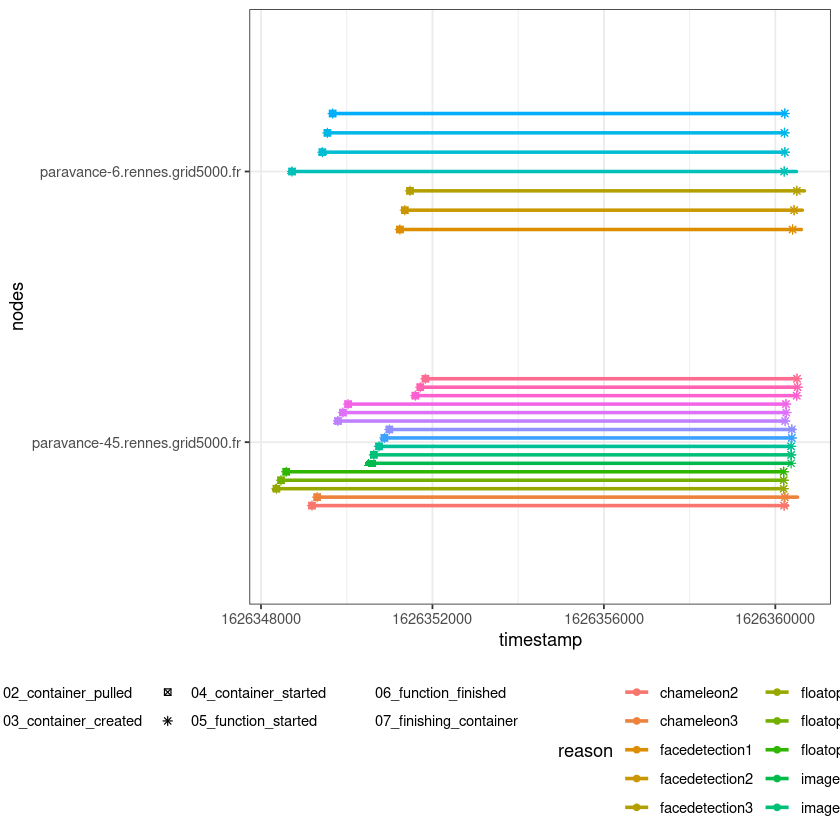

In [24]:
ggplot(data = df_plot, aes(x = node, 
                           y = timestamp, 
                           color = function_name,
                           shape = reason,
                           group = function_name)) + #, color = node)) +
    geom_line(size = 1, position = position_dodge(width = 0.5)) + 
    geom_point(position = position_dodge(width = 0.5)) +
    coord_flip() +
    labs(x = "nodes", y = "timestamp", color = "reason") +
       scale_fill_brewer(palette = "Dark2") +
       theme_bw() +
       theme(legend.position="bottom") +
       ggsave('full_line_plot_phases.png')

Saving 6.67 x 6.67 in image



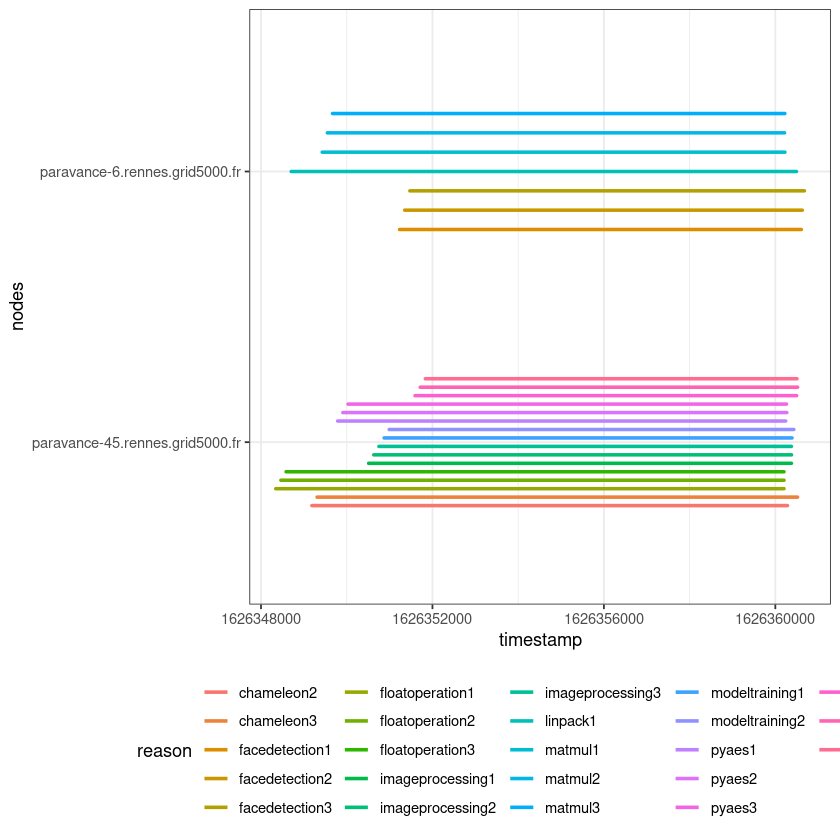

In [25]:
ggplot(data = df_plot, aes(x = node, 
                           y = timestamp, 
                           color = function_name,
                           group = function_name)) + #, color = node)) +
    geom_line(size = 1, position = position_dodge(width = 0.5)) + 
    #geom_point(position = position_dodge(width = 0.5)) +
    coord_flip() +
    labs(x = "nodes", y = "timestamp", color = "reason") +
       scale_fill_brewer(palette = "Dark2") +
       theme_bw() +
       theme(legend.position="bottom") +
       ggsave('full_line_plot_without_phases.png')

 function_name          node              reason            timestamp        
 Length:232         Length:232         Length:232         Min.   :1.626e+09  
 Class :character   Class :character   Class :character   1st Qu.:1.626e+09  
 Mode  :character   Mode  :character   Mode  :character   Median :1.626e+09  
                                                          Mean   :1.626e+09  
                                                          3rd Qu.:1.626e+09  
                                                          Max.   :1.626e+09  

 function_name          node              reason            timestamp        
 Length:90          Length:90          Length:90          Min.   :1.626e+09  
 Class :character   Class :character   Class :character   1st Qu.:1.626e+09  
 Mode  :character   Mode  :character   Mode  :character   Median :1.626e+09  
                                                          Mean   :1.626e+09  
                                                          3rd Qu.:1.626e+09  
                                                          Max.   :1.626e+09  

Saving 6.67 x 6.67 in image



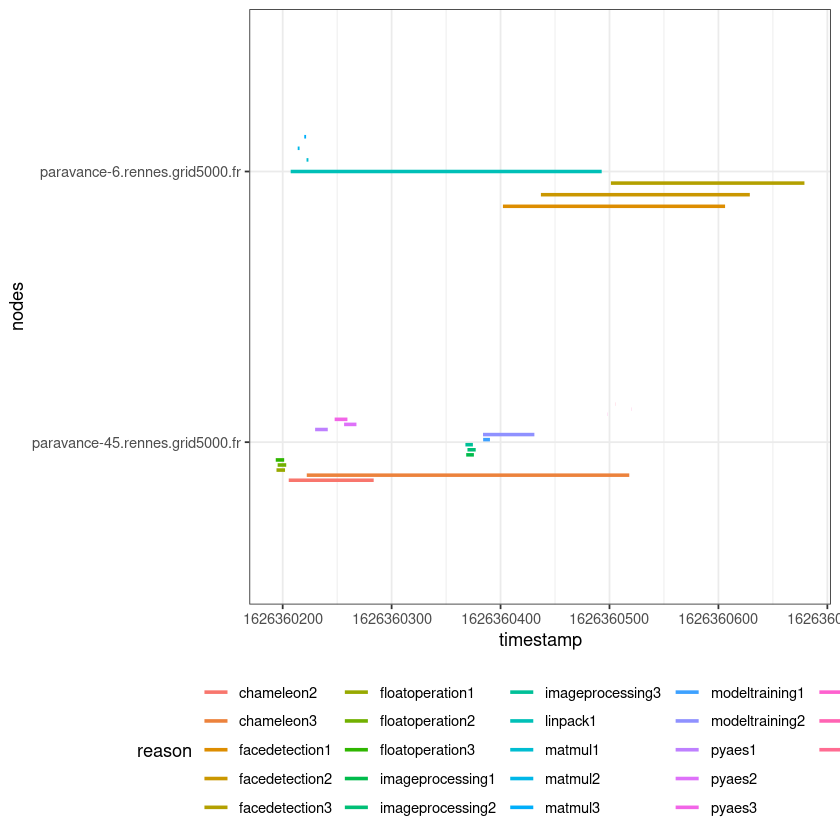

In [26]:
summary(df_plot)
df_plot2 <- df_plot %>% filter(reason == '05_function_started' | reason == '06_function_finished')
summary(df_plot2)
ggplot(data = df_plot2, aes(x = node, 
                           y = timestamp, 
                           color = function_name,
                           group = function_name)) + #, color = node)) +
    geom_line(size = 1, position = position_dodge(width = 0.3)) + 
    #geom_point(position = position_dodge(width = 0.5)) +
    coord_flip() +
    labs(x = "nodes", y = "timestamp", color = "reason") +
       scale_fill_brewer(palette = "Dark2") +
       theme_bw() +
       theme(legend.position="bottom") +
       ggsave('full_line_plot_functions_execution.png')

In [27]:
summary(df_plot)
df_plot2 <- df_plot %>% filter(reason == '00_pod_scheduled' | reason == '05_function_started')
summary(df_plot2)
ggplot(data = df_plot2, aes(x = node, 
                           y = timestamp, 
                           color = function_name,
                           group = function_name)) + #, color = node)) +
    geom_line(size = 1, position = position_dodge(width = 0.3)) + 
    #geom_point(position = position_dodge(width = 0.5)) +
    coord_flip() +
    labs(x = "nodes", y = "timestamp", color = "reason") +
       scale_fill_brewer(palette = "Dark2") +
       theme_bw() +
       theme(legend.position="bottom") +
       ggsave('full_line_plot2.png')

 function_name          node              reason            timestamp        
 Length:232         Length:232         Length:232         Min.   :1.626e+09  
 Class :character   Class :character   Class :character   1st Qu.:1.626e+09  
 Mode  :character   Mode  :character   Mode  :character   Median :1.626e+09  
                                                          Mean   :1.626e+09  
                                                          3rd Qu.:1.626e+09  
                                                          Max.   :1.626e+09  

 function_name          node              reason            timestamp        
 Length:68          Length:68          Length:68          Min.   :1.626e+09  
 Class :character   Class :character   Class :character   1st Qu.:1.626e+09  
 Mode  :character   Mode  :character   Mode  :character   Median :1.626e+09  
                                                          Mean   :1.626e+09  
                                                          3rd Qu.:1.626e+09  
                                                          Max.   :1.626e+09  

Saving 6.67 x 6.67 in image



In [28]:
a <- df_plot %>% filter(function_name == 'facedetection1')
print(a)

# A tibble: 11 x 4
   function_name  node                          reason                 timestamp
   <chr>          <chr>                         <chr>                      <dbl>
 1 facedetection1 paravance-6.rennes.grid5000.… 03_container_created      1.63e9
 2 facedetection1 paravance-6.rennes.grid5000.… 07_finishing_contain…     1.63e9
 3 facedetection1 paravance-6.rennes.grid5000.… 07_finishing_contain…     1.63e9
 4 facedetection1 paravance-6.rennes.grid5000.… 02_container_pulled       1.63e9
 5 facedetection1 paravance-6.rennes.grid5000.… 01_container_pulling      1.63e9
 6 facedetection1 paravance-6.rennes.grid5000.… 00_pod_scheduled          1.63e9
 7 facedetection1 paravance-6.rennes.grid5000.… 04_container_started      1.63e9
 8 facedetection1 paravance-6.rennes.grid5000.… 06_function_finished      1.63e9
 9 facedetection1 paravance-6.rennes.grid5000.… 06_function_finished      1.63e9
10 facedetection1 paravance-6.rennes.grid5000.… 05_function_started       1.63e9
11 facede

In [29]:
df_plot <- df_gathered %>%
    group_by(function_name, node) %>%
    mutate(sample_id = row_number()) %>% 
    ungroup() 
head(df_plot)

ggplot(data = df_plot, aes(x = timestamp, 
                           y = sample_id, 
                           color = reason, 
                           shape = node))+ #, color = node)) +
stat_bin2d(aes(fill = reason))

function_name  node                            reason              
1 chameleon2     paravance-45.rennes.grid5000.fr 03_container_created
2 chameleon2     paravance-45.rennes.grid5000.fr 03_container_created
3 chameleon3     paravance-45.rennes.grid5000.fr 03_container_created
4 chameleon3     paravance-45.rennes.grid5000.fr 03_container_created
5 facedetection1 paravance-6.rennes.grid5000.fr  03_container_created
6 facedetection1 paravance-6.rennes.grid5000.fr  03_container_created
  timestamp  sample_id
1 1626349189 1        
2         NA 2        
3 1626349309 1        
4         NA 2        
5 1626351240 1        
6         NA 2

Warning message:
“Removed 128 rows containing non-finite values (stat_bin2d).”


In [30]:
head(df_plot)
ggplot(data = df_plot, aes(x = timestamp, y = node, fill = reason, linetype = function_name))+#, color = node)) +
   geom_bar(stat='identity', position = position_stack(reverse = TRUE), color = "black")  +
   labs(x = "duration(s)", y = "pods", fill = "phase") +
   scale_fill_brewer(palette = "Dark2") +
   theme_bw() +
   ggsave('full_bar_plot_gantt.png')

function_name  node                            reason              
1 chameleon2     paravance-45.rennes.grid5000.fr 03_container_created
2 chameleon2     paravance-45.rennes.grid5000.fr 03_container_created
3 chameleon3     paravance-45.rennes.grid5000.fr 03_container_created
4 chameleon3     paravance-45.rennes.grid5000.fr 03_container_created
5 facedetection1 paravance-6.rennes.grid5000.fr  03_container_created
6 facedetection1 paravance-6.rennes.grid5000.fr  03_container_created
  timestamp  sample_id
1 1626349189 1        
2         NA 2        
3 1626349309 1        
4         NA 2        
5 1626351240 1        
6         NA 2

Saving 6.67 x 6.67 in image

Warning message:
“Removed 128 rows containing missing values (position_stack).”
Warning message:
“Removed 128 rows containing missing values (position_stack).”


In [31]:
df_plot2 <- df_plot %>% filter(function_name != 'videoprocessing1' & function_name != 'videoprocessing2' & function_name != 'videoprocessing3' &
                              function_name != 'imageprocessing1' & function_name != 'imageprocessing2' & function_name != 'imageprocessing3')

ggplot(data = df_plot2, aes(x = duration, y = function_name, fill = reason, linetype = node))+#, color = node)) +
   geom_bar(stat='identity', position = position_stack(reverse = TRUE), color = "black")  +
   labs(x = "duration(s)", y = "pods", fill = "phase") +
   scale_fill_brewer(palette = "Dark2") +
   theme_bw() +
   ggsave('full_line_plot_filtered.png')

Saving 6.67 x 6.67 in image



ERROR: Error in FUN(X[[i]], ...): object 'duration' not found
